<a href="https://colab.research.google.com/github/varuncs2011/Image_Decomposition_MPI/blob/master/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  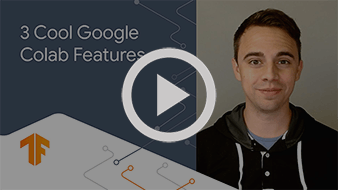
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

# New section

{0: 'PURE', 1: 'INSIGHT', 2: 'EDW', 3: 'TMP_ABIFLOW', 4: 'ABIFLOW'}


KeyError: 0

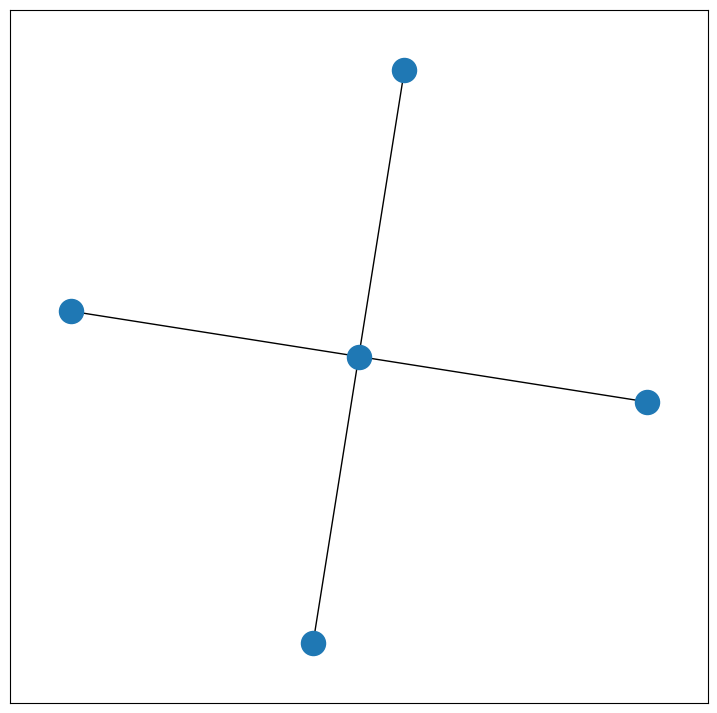

In [16]:
import networkx as nx
#G= nx.barabasi_albert_graph(100,2)
import matplotlib.pyplot as plt


node_set = ["PURE","INSIGHT","EDW","TMP_ABIFLOW","ABIFLOW"]

node_dict={}
node_dict["PURE"]=''
node_dict["INSIGHT"]=''
node_dict["EDW"]=''
node_dict["TMP_ABIFLOW"]=["PURE","INSIGHT","EDW"]
node_dict["ABIFLOW"]=["TMP_ABIFLOW"]


dg = nx.Graph()
for node in node_set:
    dg.add_node(node)
    for parent in node_dict.get(node, set()):
        dg.add_edge(parent,node)

positions=nx.kamada_kawai_layout(dg)
plt.figure(figsize =(9, 9))

labelList = ["PURE","INSIGHT","EDW","TMP_ABIFLOW","ABIFLOW"]
labels={idx: val for idx, val in enumerate(labelList)}
print(labels)
nx.draw_networkx(dg,
                 pos=positions,
                labels={idx: val for idx, val in enumerate(labelList)}
                 #,node_size=[len(labelList[i])**2 * 60 for i in positions]
                )









In [23]:
!apt install libgraphviz-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [24]:
!pip install pygraphviz


  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-linux_x86_64.whl size=168496 sha256=9fad46c59d0658c4d9d689d72f0e1793f0d1dc38bcd9b17399f2d29486394a93
  Stored in directory: /root/.cache/pip/wheels/c5/96/10/6c25add1fffc368b1927252bf73b63fcb938de8f4486e23691
Successfully built pygraphviz


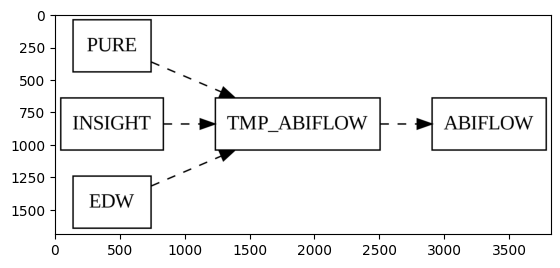

In [36]:
import io
from dataclasses import dataclass
from typing import Optional, Tuple

import matplotlib
import networkx as nx
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from networkx import DiGraph

#matplotlib.use('TkAgg')


def draw_with_graphviz(graph: DiGraph):
    for node in graph.nodes:
        graph.nodes[node]['shape'] = 'box'
        graph.nodes[node]['color'] = node.color
        graph.nodes[node]['label'] = node.label
        # graph.nodes[node]['image'] = node.description_image_path()
        # graph.nodes[node]['imagescale'] = 'both'

    for node in graph.nodes:
        if node.size:
            graph.nodes[node]['fixedsize'] = True
            graph.nodes[node]['width'] = node.size[0] / 100
            graph.nodes[node]['height'] = node.size[1] / 100
            # works only if prog='neato'
            # graph.nodes[node]['pos'] = f"{cx},{cy}"

    for edge in graph.edges:
        graph.edges[edge]['style'] = 'dashed'

    graph.graph['dpi'] = 800
    graph.graph['rankdir'] = 'LR'
    agraph = nx.nx_agraph.to_agraph(graph)

    img_bytes = agraph.draw(prog='dot', format='png')
    image_pil = Image.open(io.BytesIO(img_bytes))

    plt.imshow(image_pil)
    plt.show()


@dataclass(init=True, eq=False, repr=False)
class Node:
    label: str = 'Node'
    color: str = 'black'
    size: Optional[Tuple[int, int]] = None


#DM, U, C, B, T = Node(), Node(), Node(), Node(), Node()
#ID = Node(label='Custom size', size=(150, 22))
#ES = Node(label='Auto fits label text length 1')

#HC = Node(label='Auto\n fits\n label\n text\n size 2')
#CL = Node(label='Custom color', color='red')

node_set = ["PURE","INSIGHT","EDW","TMP_ABIFLOW","ABIFLOW"]

node_dict={}
node_dict["PURE"]=[]
node_dict["INSIGHT"]=[]
node_dict["EDW"]=[]
node_dict["TMP_ABIFLOW"]=["PURE","INSIGHT","EDW"]
node_dict["ABIFLOW"]=["TMP_ABIFLOW"]


tuple_list = []
node_list = {}
for node in node_set:
    node_list[node]=Node(label=node)

for x in node_list:
    for parent in node_dict.get(x, set()):
        tuple = (node_list[parent],node_list[x])
        tuple_list.append(tuple)


# PURE = Node(label='PURE')
# INSIGHT = Node(label='INSIGHT')
# EDW = Node(label='EDW')
# TMP_ABIFLOW = Node(label='TMP_ABIFLOW')
# ABIFLOW = Node(label='ABIFLOW')


#t_list = [(PURE,TMP_ABIFLOW),(EDW,TMP_ABIFLOW),(INSIGHT,TMP_ABIFLOW),(TMP_ABIFLOW,ABIFLOW)]
#labelList = ["PURE","INSIGHT","EDW","TMP_ABIFLOW","ABIFLOW"]

#for tuple in tuple_list:
#    print(tuple)
graph = DiGraph(tuple_list)

draw_with_graphviz(graph)